In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
%matplotlib inline

In [108]:
def invmap(x,r):
    return (r*x)/(1+x**2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


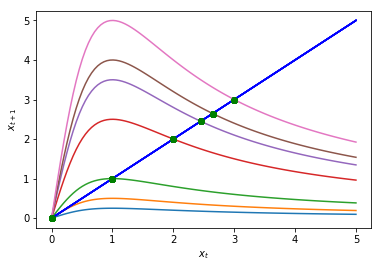

In [113]:
Np = 100
xp = np.linspace(0,5,Np)
fp = np.empty(Np)
r = np.array([0.5,1,2,5,7,8,10])
for n in range(7):
    for i in range(Np):
        fp[i] = invmap(xp[i],r[n])
    
    plt.plot(xp,xp,"b-")
    plt.plot(xp,fp)
    plt.plot((r-1)**0.5,(r-1)**0.5,"go")

    
plt.xlabel("$x_t$")
plt.ylabel("$x_{t+1}$")
plt.savefig("chaos1.png", dpi = 300)


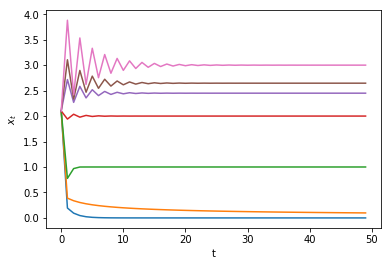

In [114]:
Np = 50
tp = np.arange(Np)
xp = np.empty(Np)
xp[0] = 2.1
for n in range(7):
    for i in range(Np-1):
        xp[i+1] = invmap(xp[i],r[n])
    plt.plot(tp,xp)
plt.xlabel("t")
plt.ylabel("$x_t$")
plt.savefig("chaos2.png", dpi = 300)

In [14]:
def invmap2(x,r):
    return math.exp(-r*x)

Text(0, 0.5, '$x_{t+1}$')

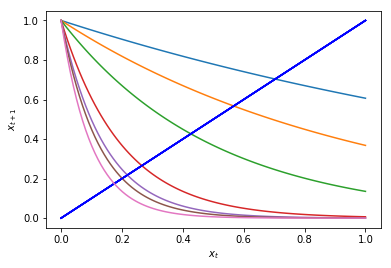

In [121]:
Np = 100
xp = np.linspace(0,1,Np)
fp = np.empty(Np)
r = np.array([0.5,1,2,5,7,8,10])
for n in range(7):
    for i in range(Np):
        fp[i] = invmap2(xp[i],r[n])
    
    plt.plot(xp,xp,"b-")
    plt.plot(xp,fp)
    

    
plt.xlabel("$x_t$")
plt.ylabel("$x_{t+1}$")



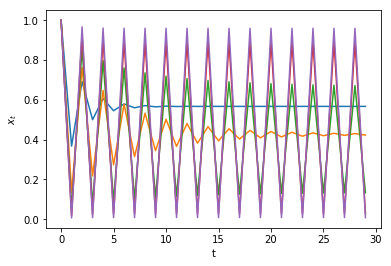

In [313]:
Np =30
rp = 5
r = np.linspace(1,5,rp)
tp = np.arange(Np)
xp = np.empty(Np)
xp[0] = 1
for n in range(rp):
    for i in range(Np-1):
        xp[i+1] = invmap2(xp[i],r[n])
    plt.plot(tp,xp)
  
plt.xlabel("t")
plt.ylabel("$x_t$")


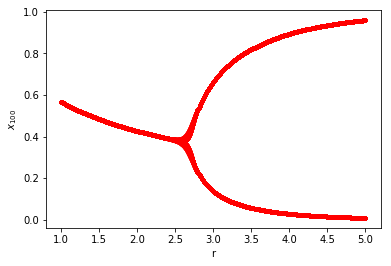

In [177]:
Nr = 300
Np = 100
rr = np.linspace(1,5,Nr)
pr = np.empty(Nr*Np)
px = np.empty(Nr*Np)
i  = 0
for r in rr:
    x = math.pi/4.
    for k in range(100):      #iterate to get to attractor
        x = invmap2(x,r)
    for k in range(Np):       #iterates to plot
        x = invmap2(x,r)
        pr[i] = r
        px[i] = x
        i += 1
plt.xlabel("r")
plt.ylabel("$x_{100}$")
plt.plot(pr,px,'r.')
plt.savefig("chaos4.png", dpi = 300)

In [156]:
def invmap3(x,r):
    return r*math.cos(x)
def invmap3_dev(x,r):
    return -r*math.sin(x)

Text(0, 0.5, '$x_{t+1}$')

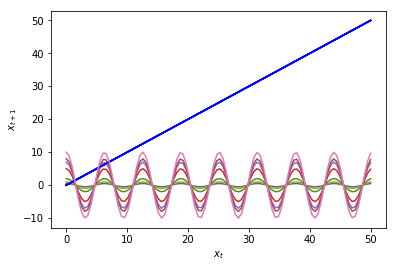

In [89]:
Np = 100
xp = np.linspace(0,50,Np)
fp = np.empty(Np)
r = np.array([0.5,1,2,5,7,8,10])
for n in range(7):
    for i in range(Np):
        fp[i] = invmap3(xp[i],r[n])
    
    plt.plot(xp,xp,"b-")
    plt.plot(xp,fp)
    

    
plt.xlabel("$x_t$")
plt.ylabel("$x_{t+1}$")

Text(0, 0.5, '$x_t$')

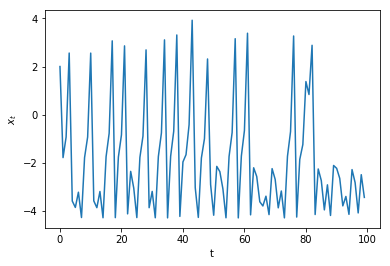

In [307]:
Np =100
rp = 4
r = np.linspace(1,5,rp)
tp = np.arange(Np)
xp = np.empty(Np)
xp[0] = 2
for n in range(1):
    for i in range(Np-1):
        xp[i+1] = invmap3(xp[i],4.3)
    plt.plot(tp,xp)
plt.xlabel("t")
plt.ylabel("$x_t$")


Text(0, 0.5, '$\\lambda$')

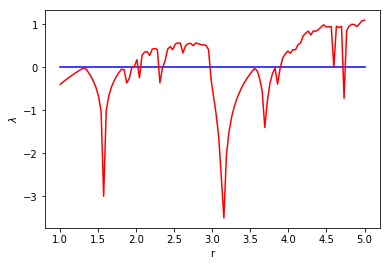

In [306]:
Nr = 120
rr = np.linspace(1,5,Nr)
ly = np.empty(Nr)
x  = math.pi/4.
 
for j in range(Nr):
    r = rr[j]
    A = 0.
    for k in range(1000):
        A = A + math.log(abs(invmap3_dev(x,r)))
        x = invmap3(x,r)
    ly[j] = A / 1000

zz = np.zeros(Nr)
plt.plot(rr,zz,'b-')
plt.plot(rr,ly,'r-')
plt.xlabel("r")
plt.ylabel("$\lambda$")


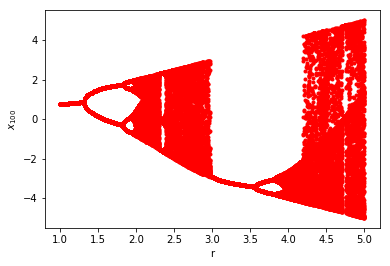

In [305]:
Nr = 300
Np = 100
rr = np.linspace(1,5,Nr)
pr = np.empty(Nr*Np)
px = np.empty(Nr*Np)
i  = 0

for r in rr:
    x = math.pi/4.
    for k in range(100):      #iterate to get to attractor
        x = invmap3(x,r)
    for k in range(Np):       #iterates to plot
        x = invmap3(x,r)
        pr[i] = r
        px[i] = x
        i += 1
plt.xlabel("r")
plt.ylabel("$x_{100}$")
plt.plot(pr,px,'r.')


Text(0, 0.5, 'y')

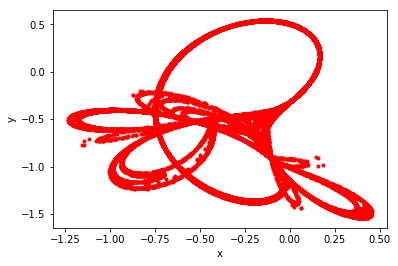

In [304]:
######Tinkerbll map ######

def tinkerbell(x,p):
    x1 = np.empty(2)
    x1[0] = x[0]**2 -x[1]**2 +p[0]*x[0] +p[1]*x[1]
    x1[1] = 2.*x[0]*x[1] + p[2]*x[0] + p[3]*x[1]
    return x1

Np = 50000
p = np.array([0.9,-0.6013,2.,0.5])
x = np.empty((Np,2))
x[0,:] = np.array([0.1,0.1])

for i in range(Np-1):
    x[i+1,:] = tinkerbell(x[i,:],p)
plt.plot(x[1000:,0],x[1000:,1], 'r.')

#plt.xlim(-0.2,-0.1)
#plt.ylim(-1,-0.2)
plt.xlabel("x")
plt.ylabel("y")



In [308]:
def pc2(f,x,r,dt):
    """advance x by dt using second-order predictor-corrector method"""
    y  = f(x,r)
    xp = x + dt*y
    yp = f(xp,r)
    x1 = x + 0.5*dt*(y+yp)
    return x1

In [309]:
def tref_f(u,r):
    """     state:  x[0]==u_1, x[1]==u_2, x[2]==0.
       parameters:  p[0]==a, p[1]==b, p[2]==c, (classic: a=b=0.2 c=5.7)"""
    du = np.empty(3)
    du[0] = -u[0]/r + u[1] - u[1]*(u[0]**2+u[1]**2)**0.5
    du[1] =  -2*u[1]/r + u[0]*(u[0]**2+u[1]**2)**0.5
    du[2] =  0
    return du


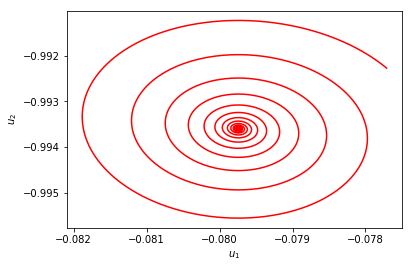

In [310]:
dt = 0.01
T0 = 0.
T1 = 300.
Ns = int(T1/dt)
t  = np.linspace(T0,T1,Ns)
u  = np.empty((Ns,3))

r  = 25  # parameters
u[0,:] = np.array([1,1,0])  # initial condition

for q in range(Ns-1):
    u[q+1,:] = pc2(tref_f,u[q,:],r,dt)

plt.plot(u[10000:,0],u[10000:,1], 'r-')
plt.xlabel("$u_1$")
plt.ylabel("$u_2$")


Text(0, 0.5, '$||u(t)||$')

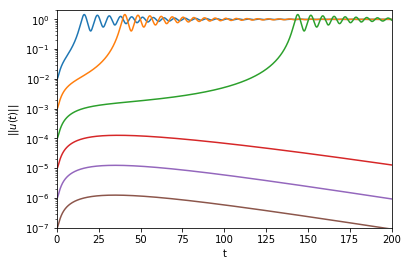

In [311]:
dt = 0.01
T0 = 0.
T1 = 300.
Ns = int(T1/dt)
t  = np.linspace(T0,T1,Ns)
u  = np.empty((Ns,3))
e = np.logspace(-2, -7, 6, 10)

r  = 50  # parameters
for n in range(6):
    u[0,:] = np.array([0,e[n],0])  # initial condition
    for q in range(Ns-1):
        u[q+1,:] = pc2(tref_f,u[q,:],r,dt)
    up = (u[:20000,0]**2+u[:20000,1]**2)**0.5
    plt.plot(t[:20000,],up)
plt.yscale('log',basey=10)
plt.ylim(10**-7,2)
plt.xlim(0,200)
plt.xlabel("t")
plt.ylabel("$||u(t)||$")


#up = (u[:20000,0]**2+u[:20000,1]**2)**0.5
#plt.plot(t[:20000,],up)